In [200]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [201]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

In [202]:
!pip install plotly

## 필요 Libarary Import

In [203]:
# 라이브러리 호출
import re
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import random

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module = 'matplotlib')

## 데이터 Load

In [204]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [205]:
data_path = '/content/drive/MyDrive/DataSet/Aiffel/Recommend_System/Movie'

In [206]:
# 데이터를 불러옵니다.
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

## Data Column

### users
- user_id : 사용자 ID
- gender : 사용자 성별
- age : 사용자 나이
- occupation : 직업(2는 artist, 8은 farmer)

In [207]:
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### ratings
- user_id : 사용자 ID
- movie_id : 영화 ID
- rating : 평점(5점 만점)
- timestamp : 평점을 매긴 시간

In [208]:
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### movies
- movie_id : 영화 ID
- title : 영화 제목'
- genres : 영화 장르

In [209]:
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Data Info

### movies

- movies 데이터에서 제목과 연도를 따로 분리함
- '|'로 구분된 장르 구분

In [210]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [211]:
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


#### 장르별 영화 개수

In [212]:
# plotly 버전
px.histogram(movies_exploded, x = 'genres_split', height = 450, title = '장르별 영화 수').update_xaxes(categoryorder = 'total descending')

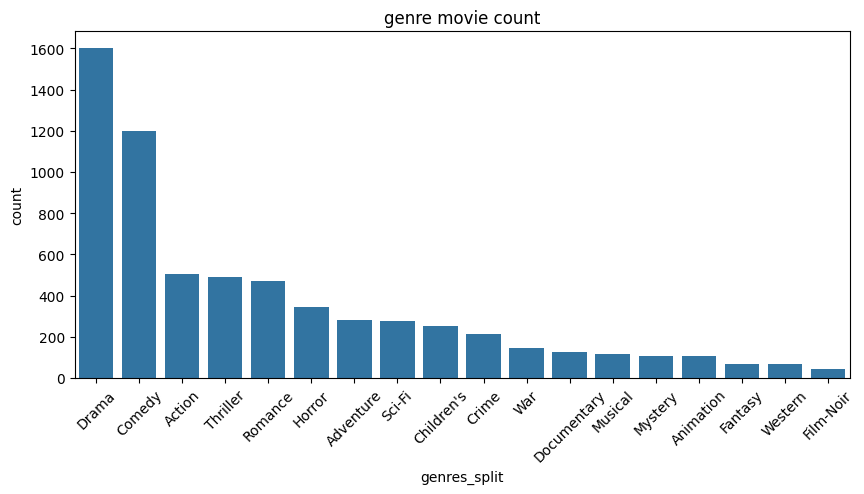

In [213]:
# seaborn 버전
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('genre movie count')
plt.xticks(rotation=45)
plt.show()

#### 연도별 영화 개수

In [214]:
# plotly 버전
movie_count_by_year = px.histogram(movies, x = 'year', height=450, title = '연도별 영화 수').update_xaxes(categoryorder = "total descending")
movie_count_by_year

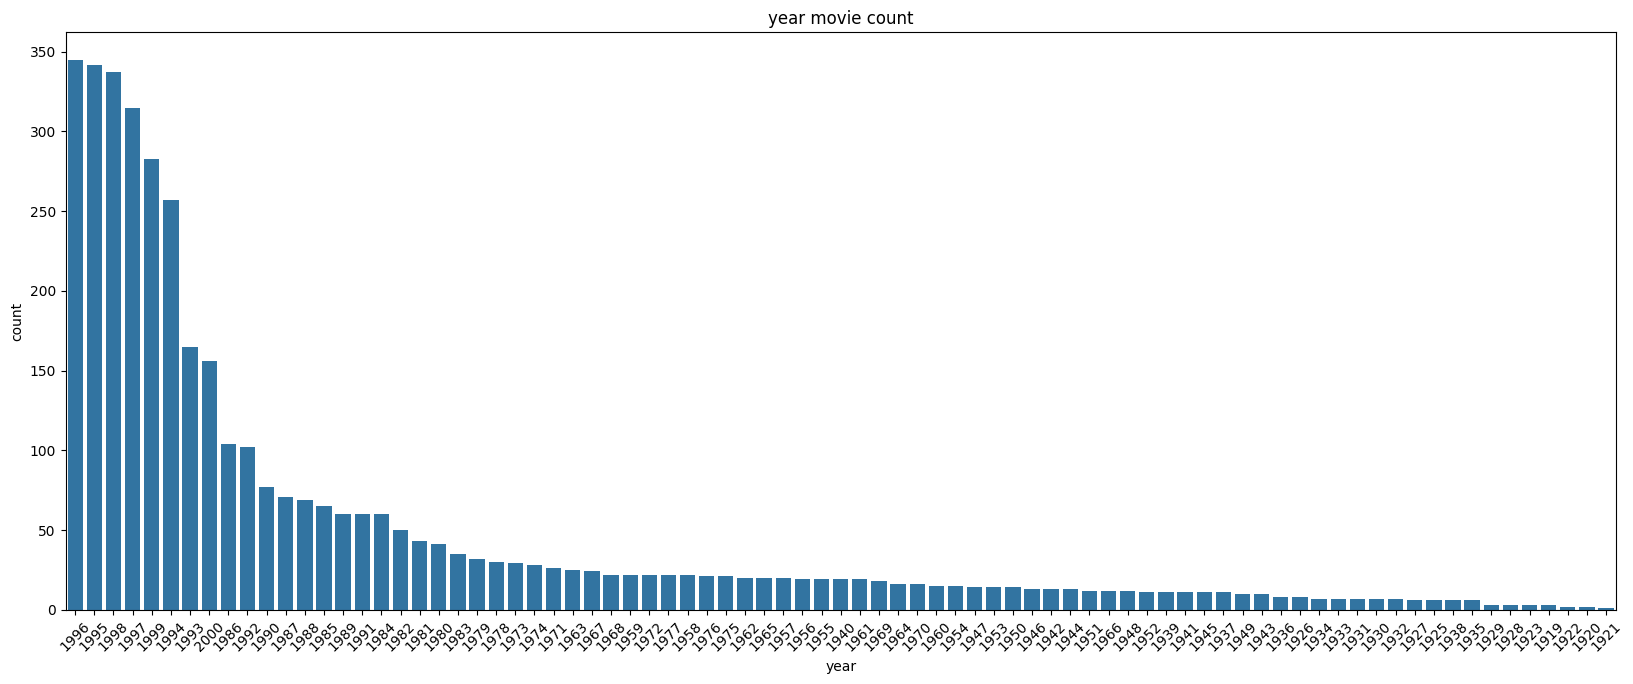

In [215]:
# seaborn 버전
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('year movie count')
plt.xticks(rotation=45)
plt.show()

### ratings
- 평균 평점
- 장르별 평점

In [216]:
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


In [217]:
# plotly 버전
px.histogram(mv_rating_agg, x='avg_rating', height=450, title='평점 분포')

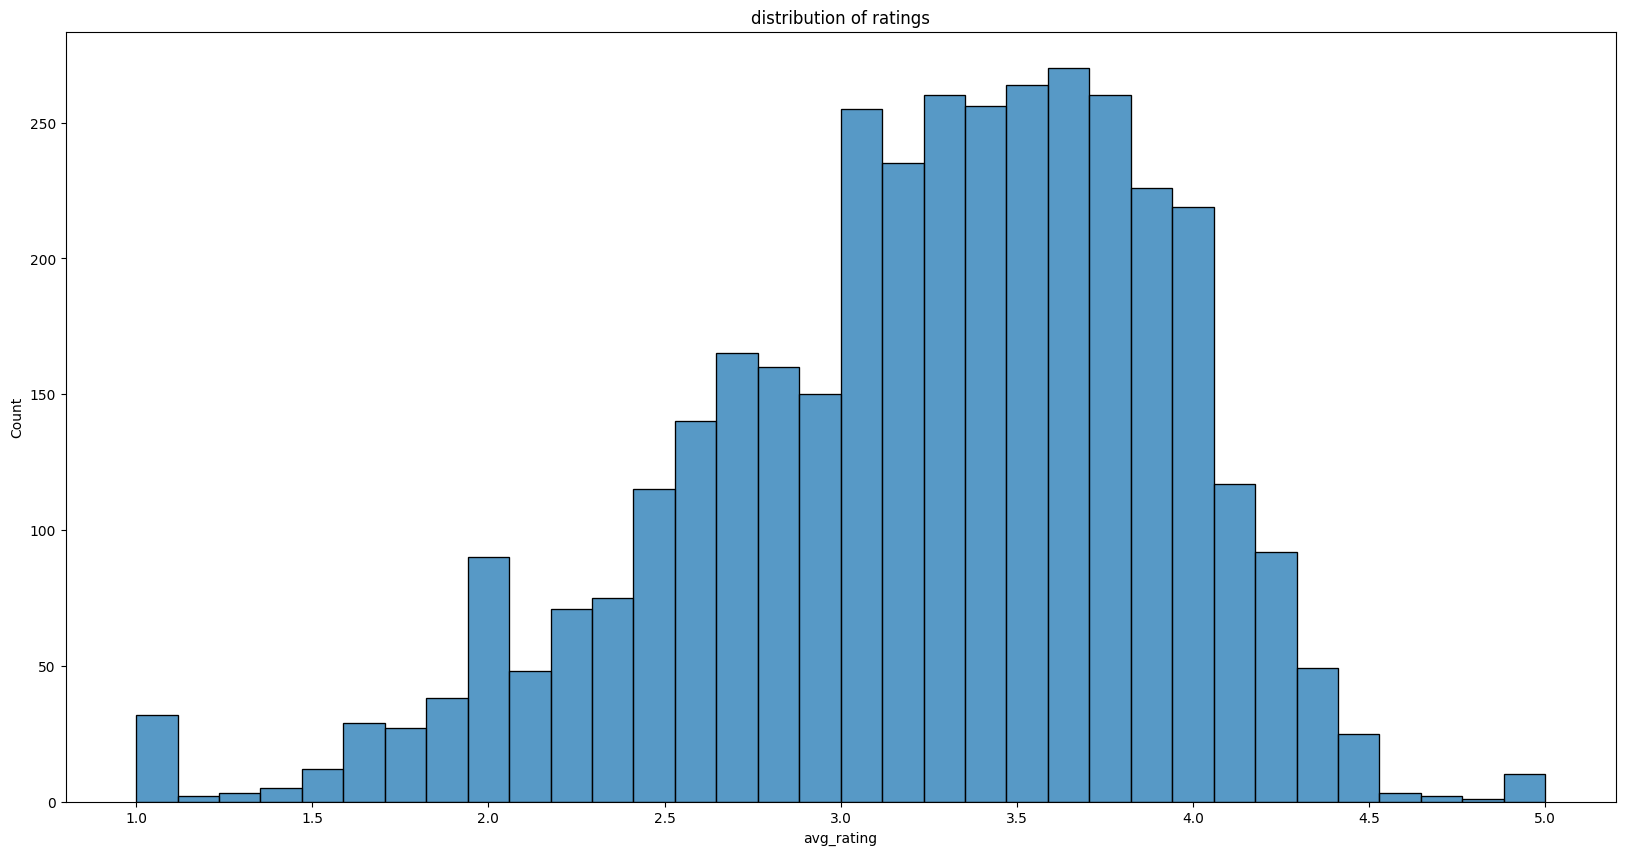

In [218]:
# seaborn 버전
sns.histplot(mv_rating_agg['avg_rating'], kde = False)
plt.gcf().set_size_inches(20, 10)
plt.title('distribution of ratings')
plt.show()

#### 장르 기준 평점 분석
- Toy Story는 3개의 장르를 가지고 있음 > 만약 평점이 4점 이상이면 3개 장르 모두 평점 4점

In [219]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']],
                              movies_exploded[['movie_id', 'genres_split']],
                              on = 'movie_id').groupby('genres_split').agg({'rating':['mean','count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [220]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip()) # 만약 rating이면 _를 기준으로 병합
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [221]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


In [222]:
# plotly 버전
px.bar(rating_by_genre_df, x = 'genres_split', y='rating_mean', height = 350, title = '장르별 평점').update_xaxes(categoryorder = "total descending")

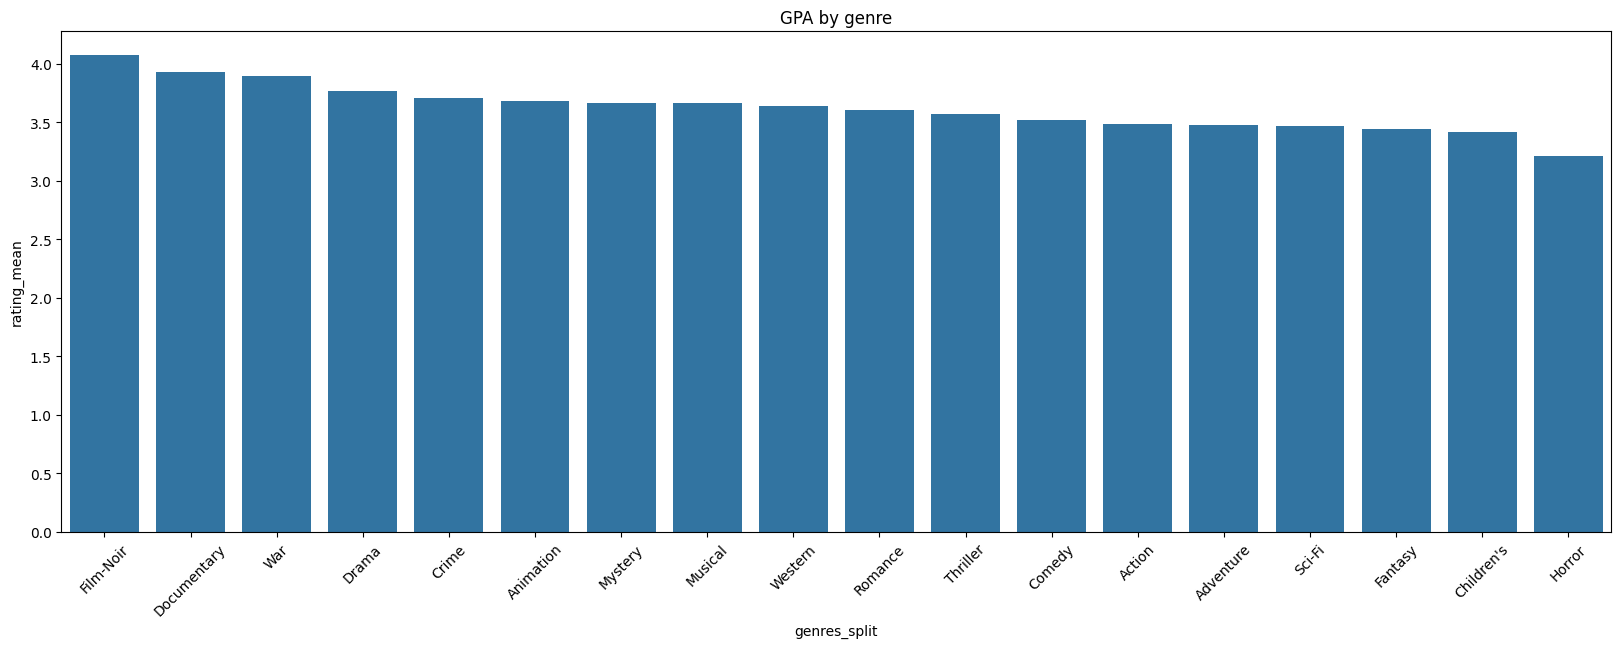

In [223]:
# seaborn 버전
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending = False)

plt.figure(figsize = (20, 6.5))
sns.barplot(x = 'genres_split', y = 'rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('GPA by genre')
plt.xticks(rotation = 45)
plt.show()

#### Question
##### 의외로 Document의 평점이 높음
##### 이상치 확인

In [224]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_count', height=350, title='장르별 평가 개수').update_xaxes(categoryorder="total descending")

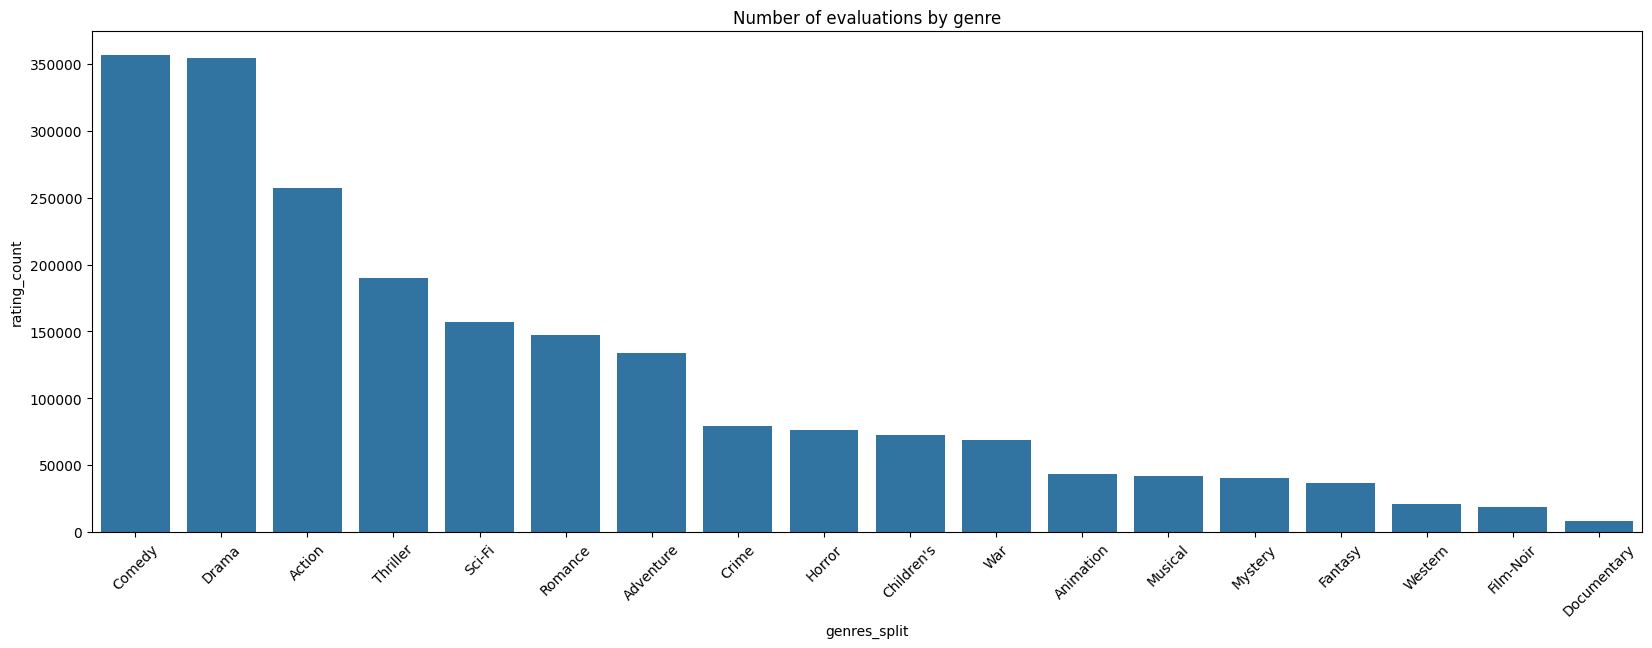

In [225]:
# seaborn 버전
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('Number of evaluations by genre')
plt.xticks(rotation=45)
plt.show()

#### Answer
##### 데이터의 개수가 별로 없음
- 편향되어 있을 수 있음
- 취향이 확고함

### users
- 사용자의 직업 매핑

In [226]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


## Data 전처리

### movies
- 1995년 >> 90년도 영화로 변경

In [227]:
movies['title'].str.extract(r'\((\d{4})\)')[0]

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
3878,2000
3879,2000
3880,2000
3881,2000


In [228]:
movies['movie_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['movie_decade'] = movies['title'].str.extract(r'\((\d{4})\)')[0].astype(int).apply(lambda x: str(x - (x % 10)) + 's') # 년도
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x)) # 제목에서 년도 제외

In [229]:
movies.head()

,movie_id,title,genres,year,genres_split,movie_year,movie_decade
0,1,Toy Story,Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]",1995,1990s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,"[Adventure, Children's, Fantasy]",1995,1990s
2,3,Grumpier Old Men,Comedy|Romance,1995,"[Comedy, Romance]",1995,1990s
3,4,Waiting to Exhale,Comedy|Drama,1995,"[Comedy, Drama]",1995,1990s
4,5,Father of the Bride Part II,Comedy,1995,[Comedy],1995,1990s


- 여러 장르 > 단일 장르로 구분

In [230]:
genres_split = movies['genres'].str.split('|')

In [231]:
max_genres = genres_split.apply(len).max()

for i in range(max_genres):
    movies[f'genre{i + 1}'] = genres_split.apply(lambda x: x[i] if i < len(x) else None)

movies.drop('genres', axis = 1, inplace = True)

# None은 공백으로 채웁니다.
movies.fillna('', inplace = True)

In [232]:
print(movies.shape)
movies.head()

(3883, 12)


,movie_id,title,year,genres_split,movie_year,movie_decade,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story,1995,"[Animation, Children's, Comedy]",1995,1990s,Animation,Children's,Comedy,,,
1,2,Jumanji,1995,"[Adventure, Children's, Fantasy]",1995,1990s,Adventure,Children's,Fantasy,,,
2,3,Grumpier Old Men,1995,"[Comedy, Romance]",1995,1990s,Comedy,Romance,,,,
3,4,Waiting to Exhale,1995,"[Comedy, Drama]",1995,1990s,Comedy,Drama,,,,
4,5,Father of the Bride Part II,1995,[Comedy],1995,1990s,Comedy,,,,,


In [233]:
set(movies['genre1'].unique().tolist() + movies['genre2'].unique().tolist() + movies['genre3'].unique().tolist())

{'',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### ratings
- Timestamp > 년, 월, 일로 변경

In [234]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,2000-12-31
1,1,661,3,2000-12-31
2,1,914,3,2000-12-31
3,1,3408,4,2000-12-31
4,1,2355,5,2001-01-06


In [235]:
ratings['rating_year'] = ratings['timestamp'].apply(lambda x : x.split('-')[0])
ratings['rating_month'] = ratings['timestamp'].apply(lambda x : x.split('-')[1])
ratings['rating_decade'] = ratings['rating_year'].astype(int).apply(lambda x : str(x - (x % 10)) + 's')

In [236]:
ratings.head()

,user_id,movie_id,rating,timestamp,rating_year,rating_month,rating_decade
0,1,1193,5,2000-12-31,2000,12,2000s
1,1,661,3,2000-12-31,2000,12,2000s
2,1,914,3,2000-12-31,2000,12,2000s
3,1,3408,4,2000-12-31,2000,12,2000s
4,1,2355,5,2001-01-06,2001,01,2000s


In [237]:
# 데이터 임시 저장

movies.to_csv(f"{data_path}/movies_prepro.csv", index = False)
ratings.to_csv(f"{data_path}/ratings_prepro.csv", index = False)
users.to_csv(f"{data_path}/users_prepro.csv", index = False)

## 추천 시스템 활용 데이터
- 명시적 데이터 : 사용자가 직접적으로 선호도를 표현한 데이터
  - 평점, 구독, 댓글, 리뷰, 좋아요, 싫어요, 차단...
  - 회귀 및 다중 분류 문제에 가까움

</br>

- 암묵적 데이터 : 사용자가 간접적으로 선호도를 표현한 데이터
  - 클릭 여부, 검색 기록, 방문 페이지, 마우스 움직임, 구매 내역, 시청 시간대
  - 클릭여부로 보게 되면 이진 분류 문제가 가능

</br>

#### 클릭을 하였다는건 관심을 보인다는 것이기에 선호라는 기준을 잡고 진행

### 선호도 관련 정보 추출 ver.1
- Random Sampling 기법 사용
- 평점이 3점 이상인 경우 선호로 가정 (label = 1)
- 평점이 2점 미만인 데이터는 Random으로 가져옴

In [238]:
ratings = ratings[ratings['rating'] >= 3] # 평점이 3점 이상인 경우 선호로 가정 (label = 1)
ratings['label'] = 1

ratings.drop('rating', axis=1, inplace = True)

print(ratings.shape)
ratings.head()

(836478, 7)


<ipython-input-238-f1b37aa527eb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-238-f1b37aa527eb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,movie_id,timestamp,rating_year,rating_month,rating_decade,label
0,1,1193,2000-12-31,2000,12,2000s,1
1,1,661,2000-12-31,2000,12,2000s,1
2,1,914,2000-12-31,2000,12,2000s,1
3,1,3408,2000-12-31,2000,12,2000s,1
4,1,2355,2001-01-06,2001,01,2000s,1


#### 사용자별 평점 3점 이상인 영화 리스트 구성

In [239]:
user_seen_movies = ratings.groupby('user_id')['movie_id'].apply(list).reset_index()
user_seen_movies.head()

,user_id,movie_id
0,1,"[1193, 661, 914, 3408, 2355, 1197, 1287, 2804,..."
1,2,"[1357, 3068, 1537, 647, 2194, 648, 2268, 2628,..."
2,3,"[3421, 648, 1394, 3534, 104, 2735, 1210, 1431,..."
3,4,"[3468, 1210, 2951, 1214, 1036, 260, 2028, 480,..."
4,5,"[2987, 2333, 1175, 39, 2337, 1535, 1392, 1466,..."


#### 사용자별 비선호 영화 리스트 구성

In [240]:
unique_movies = movies['movie_id'].unique()
unique_users = users['user_id'].unique()

negative_users = []
negative_movies = []
negative_labels = []

for user in unique_users:
    if len(user_seen_movies[user_seen_movies['user_id'] == user]) < 1: # 영화 평점을 매긴 횟수가 1번 미만일 경우 제거
        continue

    user_seen_movie_list = user_seen_movies[user_seen_movies['user_id'] == user]['movie_id'].values[0] # 사용자가 선호하는 영화 리스트를 가져옴
    user_non_seen_movie_list = list(set(unique_movies) - set(user_seen_movie_list)) # 전체 영화 리스트 중 사용자가 선호하는 영화 제외
    sample_pop_size = len(user_seen_movie_list) * 5 # 선호하는 영화 개수당 5개의 비선호 영화를 추출

    if len(unique_movies) - len(user_seen_movie_list) < len(user_seen_movie_list) * 5: # 영화 리스트 개수보다 비선호 영화 개수가 많을 경우 전체 개수에서 사용자가 선호하는 영화를 뺀 값을 넣음(max값 설정)
        sample_pop_size = len(unique_movies) - len(user_seen_movie_list)

    user_negative_movie_list = random.sample(user_non_seen_movie_list, sample_pop_size) # 랜덤 추출
    negative_users += [user for _ in range(len(user_negative_movie_list))]
    negative_movies += user_negative_movie_list
    negative_labels += [0 for _ in range(len(user_negative_movie_list))]


In [241]:
print(len(negative_users))
print(len(negative_movies))
print(len(negative_labels))

4068124
4068124
4068124


In [242]:
negative_ratings_df = pd.DataFrame({'user_id' : negative_users, 'movie_id' : negative_movies, 'label' : negative_labels})
print(negative_ratings_df.shape)
negative_ratings_df.head()

(4068124, 3)


,user_id,movie_id,label
0,1,3081,0
1,1,3005,0
2,1,918,0
3,1,1777,0
4,1,536,0


#### 모델 사용 Column
- 평점 : 사용자 ID, 영화 ID, 레이블(label)
- 영화 : 영화 ID, 년대, 년도, 장르
- 사용자 : 사용자 ID, 성별, 나이, 지역, 직업

#### 데이터 하나로 결합

In [243]:
ratings_df = ratings[['user_id', 'movie_id', 'label']]
ratings_df = pd.concat([ratings_df, negative_ratings_df], axis=0)

movies_df = movies[['movie_id', 'movie_decade', 'movie_year', 'genre1']]
movies_df.columns = ['movie_id', 'decade', 'movie_year', 'genre']
user_df = users[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [244]:
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, user_df, on='user_id')
merge_mlens_data.dropna(inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,label,decade,movie_year,genre,gender,age,occupation,zip
0,1,1193,1,1970s,1975,Drama,F,1,10,48067
1,1,661,1,1990s,1996,Animation,F,1,10,48067
2,1,914,1,1960s,1964,Musical,F,1,10,48067
3,1,3408,1,2000s,2000,Drama,F,1,10,48067
4,1,2355,1,1990s,1998,Animation,F,1,10,48067


In [245]:
# 데이터 저장
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v1.csv', index=False)

### 선호도 관련 정보 추출 ver.2
- #### 원본 데이터 사용
- 앞선 사용했던 Random Sampling 기법은 좋은 방법이 아님
- 사용자 정보를 무작위로 샘플링 하기  때문

</br>

#### 앞선 과정에서 평점 3점 이상인 데이터 label = 1, label = 0은 랜덤으로 추출
#### 이번 방법은 평점 4점 이상 label = 1, 아니면 label = 0으로 설정

In [246]:
users_df = pd.read_csv(f'{data_path}/users_prepro.csv')
ratings_df = pd.read_csv(f'{data_path}/ratings_prepro.csv')
movies_df = pd.read_csv(f'{data_path}/movies_prepro.csv')

In [247]:
print(users_df.columns)
print(ratings_df.columns)
print(movies_df.columns)

Index(['user_id', 'gender', 'age', 'occupation', 'zip', 'occupation_nm'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'rating_year',
       'rating_month', 'rating_decade'],
      dtype='object')
Index(['movie_id', 'title', 'year', 'genres_split', 'movie_year',
       'movie_decade', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5',
       'genre6'],
      dtype='object')


#### 평점 4 이상 1, 아니면 0

In [248]:
ratings_df['label'] = ratings_df['rating'].apply(lambda x : x >= 4).astype(int)

ratings_df = ratings_df[['user_id', 'movie_id', 'rating_year','rating_month', 'rating_decade', 'label']]
ratings_df.head()

,user_id,movie_id,rating_year,rating_month,rating_decade,label
0,1,1193,2000,12,2000s,1
1,1,661,2000,12,2000s,0
2,1,914,2000,12,2000s,0
3,1,3408,2000,12,2000s,1
4,1,2355,2001,1,2000s,1


In [249]:
movies_df = movies_df[['movie_id', 'movie_decade', 'movie_year', 'genre1', 'genre2', 'genre3']]
users_df = users_df[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [250]:
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, users_df, on='user_id')
merge_mlens_data.fillna('no', inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,rating_year,rating_month,rating_decade,label,movie_decade,movie_year,genre1,genre2,genre3,gender,age,occupation,zip
0,1,1193,2000,12,2000s,1,1970s,1975,Drama,no,no,F,1,10,48067
1,1,661,2000,12,2000s,0,1990s,1996,Animation,Children's,Musical,F,1,10,48067
2,1,914,2000,12,2000s,0,1960s,1964,Musical,Romance,no,F,1,10,48067
3,1,3408,2000,12,2000s,1,2000s,2000,Drama,no,no,F,1,10,48067
4,1,2355,2001,1,2000s,1,1990s,1998,Animation,Children's,Comedy,F,1,10,48067


In [251]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2000,12,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2000,12,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2000,12,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2000,12,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [252]:
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v2.csv', index=False)

### Modeling

- AutoInt 모델 사용
  - Multi-head self-attention를 활용해 입력 Feature간 상호작용과 관계성을 모델링
  - stack을 통해 다론 차원에서 학습

## 필요 Libarary Import

In [253]:
import time
import random
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MaxPooling2D, Conv2D, Dropout, Lambda, Dense, Flatten, Activation, Input, Embedding, BatchNormalization
from tensorflow.keras.initializers import glorot_normal, Zeros, TruncatedNormal
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy


from tensorflow.keras.optimizers import Adam
from collections import defaultdict
import math

### Embedding Layer
  - 만약 피처(feature) 3개가 각각 10개, 20개, 30개의 고유값을 가진다면 feature_dims는 [10, 20, 30] 형태를 띄게 됨
  - 전체 임베딩을 해야 할 개수는 10+20+30 = 60이므로 '60 x 임베딩_차원_크기'의 행렬이 생성

In [254]:
class FeaturesEmbedding(Layer):
    def __init__(self, field_dims, embed_dim, **kwargs):
        super(FeaturesEmbedding, self).__init__(**kwargs)
        self.total_dim = sum(field_dims)
        self.embed_dim = embed_dim
        self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.longlong)
        self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

    def build(self, input_shape):  # 임베딩을 빌드하고 초기화
        self.embedding.build(input_shape)
        self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

    def call(self, x): # 들어온 입력의 임베딩을 가짐
        x = x + tf.constant(self.offsets)
        return self.embedding(x)

### DNN Layer
- Tensorflow Keras에서는 Dense 레이어를 쌓아올린 구조
- 필요에 따라 배치 정규화도 사용 가능

In [255]:
class MultiLayerPerceptron(Layer):
    def __init__(self, input_dim, hidden_units, activation='relu', l2_reg=0, dropout_rate=0, use_bn=False, init_std=0.0001, output_layer=True):
        super(MultiLayerPerceptron, self).__init__()
        self.dropout_rate = dropout_rate
        self.use_bn = use_bn
        hidden_units = [input_dim] + list(hidden_units)

        if output_layer:
            hidden_units += [1]


        self.linears = [Dense(units, activation=None, kernel_initializer=tf.random_normal_initializer(stddev=init_std),
                              kernel_regularizer=tf.keras.regularizers.l2(l2_reg)) for units in hidden_units[1:]] # Layer 쌓아 올림


        self.activation = tf.keras.layers.Activation(activation) # 활성화 함수

        if self.use_bn: # 필요할 경우 배치정규화도 진행
            self.bn = [BatchNormalization() for _ in hidden_units[1:]]

        self.dropout = Dropout(dropout_rate)


    def call(self, inputs, training=False):
        x = inputs

        for i in range(len(self.linears)): # input data가 들어오면 layer를 돌면서 벡터 값을 가져옴

            x = self.linears[i](x)

            if self.use_bn:
                x = self.bn[i](x, training=training)

            x = self.activation(x)
            x = self.dropout(x, training=training) # 각 layer마다 나온 벡터 값에 활성화 함수와 dropout을 적용시켜 비선형성 구조와 과적합을 방지

        return x

### MultiHeadSelfAttention
- 필요에 따라 잔차 연결(residual connection)도 진행

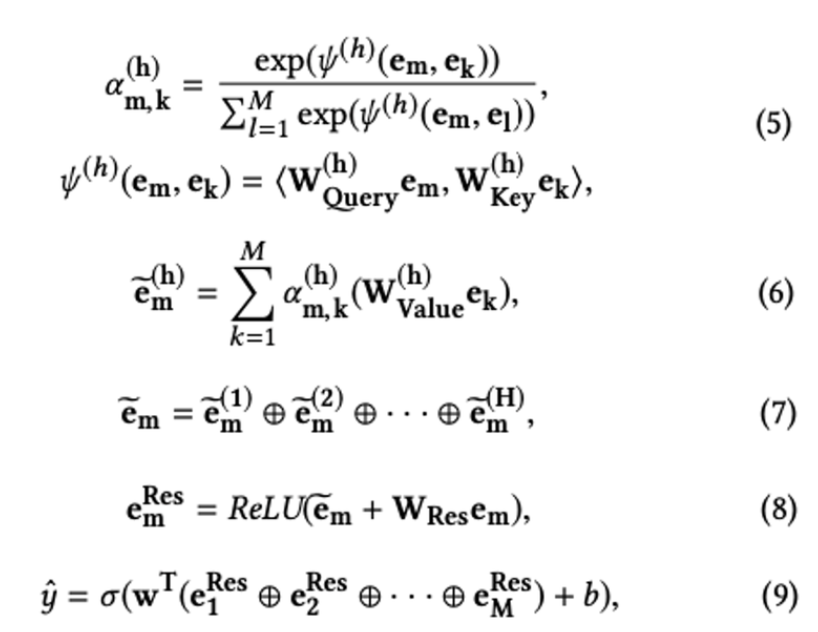

In [256]:
class MultiHeadSelfAttention(Layer):
    def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
        if head_num <= 0:
            raise ValueError('head_num must be a int > 0')
        self.att_embedding_size = att_embedding_size
        self.head_num = head_num
        self.use_res = use_res
        self.seed = seed
        self.scaling = scaling
        super(MultiHeadSelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(input_shape)))
        embedding_size = int(input_shape[-1])

        # 쿼리에 해당하는 매트릭스
        self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed))

        # 키에 해당되는 매트릭스
        self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                     dtype=tf.float32,
                                     initializer=TruncatedNormal(seed=self.seed + 1))

        # 값(value)에 해당되는 매트릭스
        self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed + 2))

        # 필요하다면 잔차 연결도 할 수 있음
        if self.use_res:
            self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                         dtype=tf.float32,
                                         initializer=TruncatedNormal(seed=self.seed))

        super(MultiHeadSelfAttention, self).build(input_shape)

    def call(self, inputs, **kwargs):
        if K.ndim(inputs) != 3:
            raise ValueError("Unexpected inputs dimensions %d, expect to be 3 dimensions" % (K.ndim(inputs)))

        # 입력이 들어오면 쿼리, 키, 값(value)에 매칭되어 각각의 값을 가지고 옵니다.
        querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))
        keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
        values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

        # 헤드 개수에 따라 데이터를 분리
        querys = tf.stack(tf.split(querys, self.head_num, axis=2))
        keys = tf.stack(tf.split(keys, self.head_num, axis=2))
        values = tf.stack(tf.split(values, self.head_num, axis=2))

        # 쿼리와 키를 먼저 곱해줍니다. - (5)
        inner_product = tf.matmul(querys, keys, transpose_b=True)
        if self.scaling:
            inner_product /= self.att_embedding_size ** 0.5
        self.normalized_att_scores =  tf.nn.softmax(inner_product)

        # 쿼리와 키에서 나온 어텐션 값을 값(value)에 곱해줍니다. - (6)
        result = tf.matmul(self.normalized_att_scores, values)

        # 쪼개어진 멀테 헤드를 모아줍니다.- (7)
        result = tf.concat(tf.split(result, self.head_num, ), axis=-1)
        result = tf.squeeze(result, axis=0)

        if self.use_res:
            result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
        result = tf.nn.relu(result)

        return result

    def compute_output_shape(self, input_shape):
        return (None, input_shape[1], self.att_embedding_size * self.head_num)

    def get_config(self, ):
        config = {'att_embedding_size': self.att_embedding_size, 'head_num': self.head_num, 'use_res': self.use_res,'seed': self.seed}
        base_config = super(MultiHeadSelfAttention, self).get_config()
        base_config.update(config)
        return base_config

### AutoInt

In [257]:
class AutoInt(Layer):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoInt, self).__init__()

        self.embedding = FeaturesEmbedding(field_dims, embedding_size)# 임베딩 레이어를 정의
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size
        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std)) # 마지막 출력 레이어를 정의
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)] # 멀티 레이어 퍼셉트론 레이어를 정의

    def call(self, inputs):
        att_input = self.embedding(inputs) # input 데이터에 해당되는 embedding 값을 가져옴
        for layer in self.int_layers: # 멀티 헤드 셀프 어텐션 레이어에서 상호작용을 수행
            att_input = layer(att_input)

        att_output = Flatten()(att_input) # 최종 출력입니다.
        att_output = self.final_layer(att_output)
        y_pred = tf.nn.sigmoid(att_output) # sigmoid로 예측값을 출력합니다.

        return y_pred

### 평가 지표
- [평가 지표 참고 함수](https://www.programcreek.com/python/?code=MaurizioFD%2FRecSys2019_DeepLearning_Evaluation%2FRecSys2019_DeepLearning_Evaluation-master%2FConferences%2FKDD%2FMCRec_our_interface%2FMCRecRecommenderWrapper.py)

In [258]:
def get_DCG(ranklist, y_true):
    dcg = 0.0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item in y_true:
            dcg += 1.0 / math.log(i + 2)
    return  dcg

def get_IDCG(ranklist, y_true):
    idcg = 0.0
    i = 0
    for item in y_true:
        if item in ranklist:
            idcg += 1.0 / math.log(i + 2)
            i += 1
    return idcg

def get_NDCG(ranklist, y_true): # NDCG 평가 지표
    ranklist = np.array(ranklist).astype(int)
    y_true = np.array(y_true).astype(int)
    dcg = get_DCG(ranklist, y_true)
    idcg = get_IDCG(y_true, y_true)
    if idcg == 0:
        return 0
    return round( (dcg / idcg), 5)

def get_hit_rate(ranklist, y_true): # hitrate 평가 지표
    c = 0
    for y in y_true:
        if y in ranklist:
            c += 1
    return round( c / len(y_true), 5 )

### Model Test

In [259]:
def test_model(model, test_df): # 모델 테스트

    user_pred_info = defaultdict(list)
    total_rows = len(test_df)

    for i in range(0, total_rows, batch_size):
        features = test_df.iloc[i:i + batch_size, :-1].values
        y_pred = model.predict(features, verbose=False)
        for feature, p in zip(features, y_pred):
            u_i = feature[:2]
            user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))

    return user_pred_info

## Data Load

In [260]:
movielens_rcmm = pd.read_csv(f"{data_path}/movielens_rcmm_v2.csv", dtype = str)
print(movielens_rcmm.shape)
movielens_rcmm.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2000,12,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2000,12,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2000,12,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2000,12,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


## Label encoder
### [sklearn의 LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
#### label은 제외한 각 컬럼을 돌면서 각각의 고윳값들을 0부터 n까지 매핑시킵니다.


In [261]:
label_encoders = {col: LabelEncoder() for col in movielens_rcmm.columns[:-1]} # label은 제외

for col, le in label_encoders.items():
    movielens_rcmm[col] = le.fit_transform(movielens_rcmm[col])

In [262]:
movielens_rcmm.head()

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,0,189,6,55,0,3,0,7,17,15,0,0,2,1588,1
1,0,3374,8,76,0,3,0,2,2,8,0,0,2,1588,0
2,0,3615,5,44,0,3,0,11,12,15,0,0,2,1588,0
3,0,2503,9,80,0,3,0,7,17,15,0,0,2,1588,1
4,0,1374,8,78,1,0,0,2,2,2,0,0,2,1588,1


In [263]:
movielens_rcmm['label'] = movielens_rcmm['label'].astype(np.float32)

### Train, Test 데이터셋 분리

In [264]:
train_df, test_df = train_test_split(movielens_rcmm, test_size = 0.2, random_state = 42)

In [265]:
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'

field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int64).values, axis = 0) + 1
field_dims

array([6040, 3706,   10,   81,    4,   12,    1,   18,   18,   16,    2,
          7,   21, 3439])

#### epoch, learning rate, drop out, batch_size, Embedding 등 정의

In [266]:
epochs = 5
learning_rate = 0.0001
dropout = 0.4
batch_size = 2048
embed_dim = 16

In [267]:
class AutoIntModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num = 3, att_head_num = 2
                 , att_res = True, l2_reg_dnn = 0, l2_reg_embedding = 1e-5, dnn_use_bn = False
                 , dnn_dropout = 0, init_std = 0.0001):

        super(AutoIntModel, self).__init__()
        self.autoInt_layer = AutoInt(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num,
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std
                                    )

    def call(self, inputs, training=False):
        return self.autoInt_layer(inputs, training=training)

### 모델 정의

In [268]:
autoInt_model = AutoIntModel(field_dims, embed_dim, att_layer_num = 3, att_head_num = 2, att_res = True,
                             l2_reg_dnn = 0, l2_reg_embedding = 1e-5, dnn_use_bn = False
                             , dnn_dropout = dropout, init_std = 0.0001)

### 옵티마이저, 오차함수 정의

In [269]:
optimizer = Adam(learning_rate = learning_rate)
loss_fn = BinaryCrossentropy(from_logits = False)

### Model Learning

In [270]:
autoInt_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

In [271]:
history = autoInt_model.fit(train_df[u_i_feature + meta_features], train_df[label], epochs = epochs, batch_size = batch_size, validation_split = 0.1)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 91s 235ms/step - binary_crossentropy: 0.6876 - loss: 0.6876 - val_binary_crossentropy: 0.6513 - val_loss: 0.6513
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 132s 206ms/step - binary_crossentropy: 0.6379 - loss: 0.6379 - val_binary_crossentropy: 0.5869 - val_loss: 0.5869
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 84s 211ms/step - binary_crossentropy: 0.5669 - loss: 0.5669 - val_binary_crossentropy: 0.5488 - val_loss: 0.5488
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 84s 218ms/step - binary_crossentropy: 0.5421 - loss: 0.5421 - val_binary_crossentropy: 0.5437 - val_loss: 0.5437
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 212ms/step - binary_crossentropy: 0.5350 - loss: 0.5350 - val_binary_crossentropy: 0.5410 - val_loss: 0.5410


### Model Test

In [272]:
# 사용자에게 예측된 정보를 저장하는 딕셔너리
user_pred_info = {}

# top10개
top = 10

# 테스트 값을 가지고 옵니다.
mymodel_user_pred_info = test_model(autoInt_model, test_df)

# 사용자마다 돌면서 예측 데이터 중 가장 높은 top 10만 가져옵니다.
for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave = True):
    ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
    ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
    user_pred_info[str(user)] = ranklist

# 원본 테스트 데이터에서 label이 1인 사용자 별 영화 정보를 가져옵니다.
test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

<ipython-input-259-e97bd5de8ee9>:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

100%|██████████| 6038/6038 [00:00<00:00, 54497.27it/s]


In [273]:
mymodel_ndcg_result = {}
mymodel_hitrate_result = {}

# 모델 예측값과 원본 테스트 데이터를 비교해서 어느정도 성능이 나왔는지 NDCG와 Hitrate를 비교합니다.

# NDCG
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # NDCG 값 구하기
    user_ndcg = get_NDCG(mymodel_pred, testset)

    mymodel_ndcg_result[user] = user_ndcg

# Hitrate
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # hitrate 값 구하기
    user_hitrate = get_hit_rate(mymodel_pred, testset)

    # 사용자 hitrate 결과 저장
    mymodel_hitrate_result[user] = user_hitrate

100%|██████████| 5994/5994 [00:00<00:00, 30119.83it/s]


In [274]:
print(" mymodel ndcg : ", round(np.mean(list(mymodel_ndcg_result.values())), 5))
print(" mymodel hitrate : ", round(np.mean(list(mymodel_hitrate_result.values())), 5))

 mymodel ndcg :  0.66181
 mymodel hitrate :  0.63028


In [275]:
np.save('/content/drive/MyDrive/DataSet/Aiffel/Recommend_System/Movie/field_dims.npy', field_dims)

### 모델의 가중치 저장

In [276]:
autoInt_model.save_weights('/content/drive/MyDrive/DataSet/Aiffel/Recommend_System/Movie/Model/autoInt_model.weights.h5')

In [277]:
import joblib

# 모델 객체를 pickled binary file 형태로 저장
joblib.dump(label_encoders, '/content/drive/MyDrive/DataSet/Aiffel/Recommend_System/Movie/label_encoders.pkl')

['/content/drive/MyDrive/DataSet/Aiffel/Recommend_System/Movie/label_encoders.pkl']